In [1]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import scipy.stats as sci
import statistics as stt
import seaborn as sns
import pandas as pd
import numpy as np
import joypy
import csv

# Load data

In [2]:
d = {}
num_simulations=50
for i in range(num_simulations):
    csv_filename = '/home/roboticslab/Robotology/Repos/allostractor/data/dynamicEnv_new/staticQ/Plasticity_normalAtt/' + str(i+1) + '.csv'
    d["data{0}".format(i)] = pd.read_csv(csv_filename)

In [3]:
simulations = len(d)
timesteps = d['data0'].shape[0]

print('Number of simulations = ' + str(simulations))
print('Number of columns = ' + str(d['data0'].shape[1]))
print('Number of timesteps = ' + str(timesteps))
print('Column names = ' + str(d['data0'].columns))

Number of simulations = 50
Number of columns = 12
Number of timesteps = 100000
Column names = Index(['Xposition', 'Yposition', 'aVtemperature', 'aVthirst', 'DriveTemp',
       'DriveThirst', 'TFtemperature', 'TFthirst', 'attractorQ', 'Grad_Temp',
       'we_temp', 'we_thirst'],
      dtype='object')


# Individual analysis

In [4]:
Xpose = d['data0']['Xposition'].to_list()
Ypose = d['data0']['Yposition'].to_list()

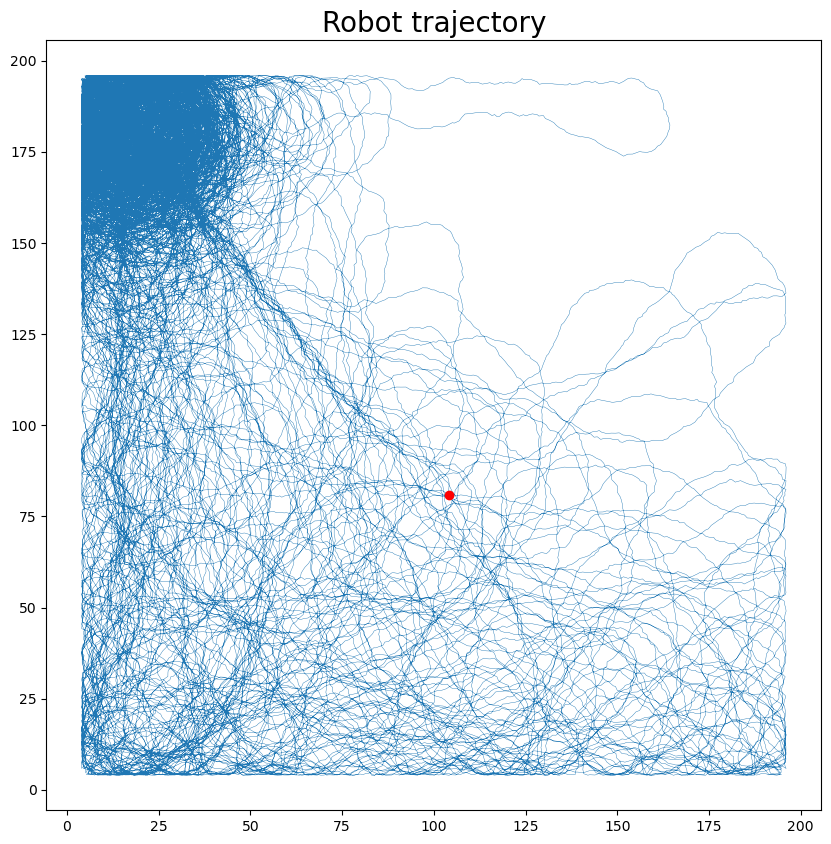

In [5]:
plt.figure(figsize=(10, 10))
plt.plot(Xpose, Ypose, linewidth=0.3)
plt.yticks(np.arange(0, 210, step=25))
plt.xticks(np.arange(0, 210, step=25))
plt.title('Robot trajectory', fontsize=20)
plt.plot(Xpose[0],Ypose[0],'ro')
plt.show()

In [6]:
periods = 5
period_len = d['data0'].shape[0]/5
period_limits = []
for i in range(periods+1):
    period_limits.append(int(period_len*i))
period_limits

[0, 20000, 40000, 60000, 80000, 100000]

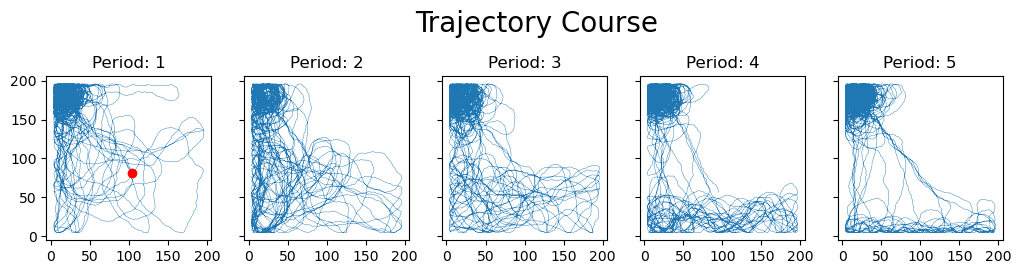

In [7]:
fig = plt.figure(figsize=(20, 20))
plots = []
counter = 0
for i in range(5):
    ax = plt.subplot2grid((8,8), (1,i))
    ax.plot(Xpose[period_limits[counter]:period_limits[counter+1]], Ypose[period_limits[counter]:period_limits[counter+1]], linewidth=0.3)
    if counter == 0: ax.plot(Xpose[period_limits[counter]],Ypose[period_limits[counter]],'ro')
    plt.yticks(np.arange(0, 210, step=50))
    plt.xticks(np.arange(0, 210, step=50))
    if i != 0:
        ax.tick_params(labelleft=False)
    plt.title('Period: ' + str(i+1), fontsize=12)
    counter += 1

fig.suptitle('Trajectory Course', fontsize=20, y=0.815, x =0.37)
plt.show()
fig.savefig('/home/roboticslab/Robotology/Repos/allostractor/Plots/DynamicEnv/FixedQ/SMTrajectoryCourse.png', format='png', bbox_inches='tight')

# Group analysis

## Position analysis based on attractor dominance per period

Each simulation was divided into five periods to observe adaptation to changes in the temperature gradient.

Position in X and Y axes are grouped per period taking into accounte attractor dominance. This results in 10 gruops: 5 periods x 2 attractors.

In [8]:
# Mean X position during Temp dominance
XpTemp1 = []
XpTemp2 = []
XpTemp3 = []
XpTemp4 = []
XpTemp5 = []
counter = 0
for i in range(num_simulations):
        dict_name = 'data'+ str(counter)
        counter += 1
        for j in range(timesteps):
            if d[dict_name]['TFtemperature'][j] > d[dict_name]['TFthirst'][j]:
                if j >= period_limits[0] and j < period_limits[1]:
                    XpTemp1.append(d[dict_name]['Xposition'][j])
                if j >= period_limits[1] and j < period_limits[2]:
                    XpTemp2.append(d[dict_name]['Xposition'][j])
                if j >= period_limits[2] and j < period_limits[3]:
                    XpTemp3.append(d[dict_name]['Xposition'][j])
                if j >= period_limits[3] and j < period_limits[4]:
                    XpTemp4.append(d[dict_name]['Xposition'][j])
                if j >= period_limits[4] and j < period_limits[5]:
                    XpTemp5.append(d[dict_name]['Xposition'][j])

In [9]:
# Mean Y position during Temp dominance
YpTemp1 = []
YpTemp2 = []
YpTemp3 = []
YpTemp4 = []
YpTemp5 = []
counter = 0
for i in range(num_simulations):
        dict_name = 'data'+ str(counter)
        counter += 1
        for j in range(timesteps):
            if d[dict_name]['TFtemperature'][j] > d[dict_name]['TFthirst'][j]:
                if j >= period_limits[0] and j < period_limits[1]:
                    YpTemp1.append(d[dict_name]['Yposition'][j])
                if j >= period_limits[1] and j < period_limits[2]:
                    YpTemp2.append(d[dict_name]['Yposition'][j])
                if j >= period_limits[2] and j < period_limits[3]:
                    YpTemp3.append(d[dict_name]['Yposition'][j])
                if j >= period_limits[3] and j < period_limits[4]:
                    YpTemp4.append(d[dict_name]['Yposition'][j])
                if j >= period_limits[4] and j < period_limits[5]:
                    YpTemp5.append(d[dict_name]['Yposition'][j])

In [10]:
# Mean X position during Thirst dominance
XpThirst1 = []
XpThirst2 = []
XpThirst3 = []
XpThirst4 = []
XpThirst5 = []
counter = 0
for i in range(num_simulations):
        dict_name = 'data'+ str(counter)
        counter += 1
        for j in range(timesteps):
            if d[dict_name]['TFtemperature'][j] < d[dict_name]['TFthirst'][j]:
                if j >= period_limits[0] and j < period_limits[1]:
                    XpThirst1.append(d[dict_name]['Xposition'][j])
                if j >= period_limits[1] and j < period_limits[2]:
                    XpThirst2.append(d[dict_name]['Xposition'][j])
                if j >= period_limits[2] and j < period_limits[3]:
                    XpThirst3.append(d[dict_name]['Xposition'][j])
                if j >= period_limits[3] and j < period_limits[4]:
                    XpThirst4.append(d[dict_name]['Xposition'][j])
                if j >= period_limits[4] and j < period_limits[5]:
                    XpThirst5.append(d[dict_name]['Xposition'][j])

In [11]:
# Mean Y position during Thirst dominance
YpThirst1 = []
YpThirst2 = []
YpThirst3 = []
YpThirst4 = []
YpThirst5 = []
counter = 0
for i in range(num_simulations):
        dict_name = 'data'+ str(counter)
        counter += 1
        for j in range(timesteps):
            if d[dict_name]['TFtemperature'][j] < d[dict_name]['TFthirst'][j]:
                if j >= period_limits[0] and j < period_limits[1]:
                    YpThirst1.append(d[dict_name]['Yposition'][j])
                if j >= period_limits[1] and j < period_limits[2]:
                    YpThirst2.append(d[dict_name]['Yposition'][j])
                if j >= period_limits[2] and j < period_limits[3]:
                    YpThirst3.append(d[dict_name]['Yposition'][j])
                if j >= period_limits[3] and j < period_limits[4]:
                    YpThirst4.append(d[dict_name]['Yposition'][j])
                if j >= period_limits[4] and j < period_limits[5]:
                    YpThirst5.append(d[dict_name]['Yposition'][j])

Once gruped the positions, means are calculate per each period and dominance

In [12]:
XpThirst_period = [stt.median(XpThirst1),stt.median(XpThirst2),stt.median(XpThirst3),stt.median(XpThirst4),stt.median(XpThirst5)]
YpThirst_period = [stt.median(YpThirst1),stt.median(YpThirst2),stt.median(YpThirst3),stt.median(YpThirst4),stt.median(YpThirst5)]

XpTemp_period = [stt.median(XpTemp1),stt.median(XpTemp2),stt.median(XpTemp3),stt.median(XpTemp4),stt.median(XpTemp5)]
YpTemp_period = [stt.median(YpTemp1),stt.median(YpTemp2),stt.median(YpTemp3),stt.median(YpTemp4),stt.median(YpTemp5)]

print(XpThirst_period)
print(YpThirst_period)
print(XpTemp_period)
print(YpTemp_period)

[21.441986933134363, 21.261193540707172, 21.20523376288459, 21.258820740843326, 21.928788957059744]
[174.94629467938, 173.9895857956869, 173.8940532177097, 173.31979179168832, 173.48048144532163]
[56.430288640676046, 57.03518031674962, 57.83159289854402, 61.84982755184882, 78.56675897277431]
[92.78329509915633, 71.84774467891734, 50.56819645223533, 28.415118891090486, 9.23522834495258]


So far mean X and Y positions were calculated per each of the 5 periods and during Temperature or Thirst dominance.

Now, all X and Y positions are groped per period without taking into account attractor dominance. This will allow to plot the occupancy map.

In [13]:
Xp1 = []
Xp2 = []
Xp3 = []
Xp4 = []
Xp5 = []
for i in range(periods):
    counter = 0
    for j in range(num_simulations):
        dict_name = 'data'+ str(counter)
        counter += 1
        
        if i == 0:
            for n in d[dict_name]['Xposition'][period_limits[i]:period_limits[i+1]]:
                Xp1.append(n)
        if i == 1:
            for n in d[dict_name]['Xposition'][period_limits[i]:period_limits[i+1]]:
                Xp2.append(n)
        if i == 2:
            for n in d[dict_name]['Xposition'][period_limits[i]:period_limits[i+1]]:
                Xp3.append(n)
        if i == 3:
            for n in d[dict_name]['Xposition'][period_limits[i]:period_limits[i+1]]:
                Xp4.append(n)
        if i == 4:
            for n in d[dict_name]['Xposition'][period_limits[i]:period_limits[i+1]]:
                Xp5.append(n)
                
Group_X_period = [Xp1, Xp2, Xp3, Xp4, Xp5]

Yp1 = []
Yp2 = []
Yp3 = []
Yp4 = []
Yp5 = []
for i in range(periods):
    counter = 0
    for j in range(num_simulations):
        dict_name = 'data'+ str(counter)
        counter += 1
        
        if i == 0:
            for n in d[dict_name]['Yposition'][period_limits[i]:period_limits[i+1]]:
                Yp1.append(n)
        if i == 1:
            for n in d[dict_name]['Yposition'][period_limits[i]:period_limits[i+1]]:
                Yp2.append(n)
        if i == 2:
            for n in d[dict_name]['Yposition'][period_limits[i]:period_limits[i+1]]:
                Yp3.append(n)
        if i == 3:
            for n in d[dict_name]['Yposition'][period_limits[i]:period_limits[i+1]]:
                Yp4.append(n)
        if i == 4:
            for n in d[dict_name]['Yposition'][period_limits[i]:period_limits[i+1]]:
                Yp5.append(n)
                
Group_Y_period = [Yp1, Yp2, Yp3, Yp4, Yp5]

### Occupancy Map per period

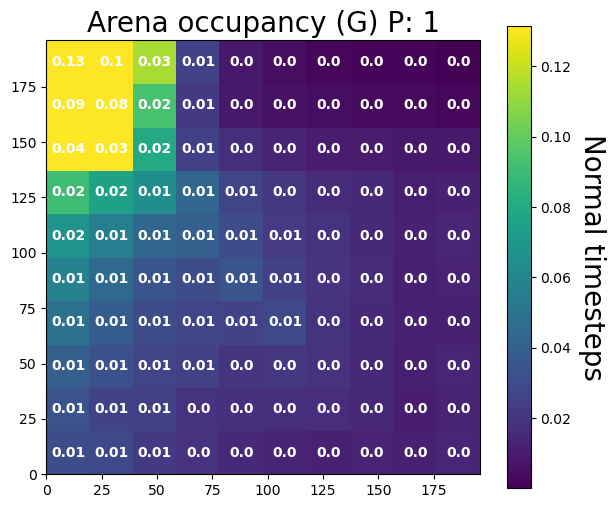

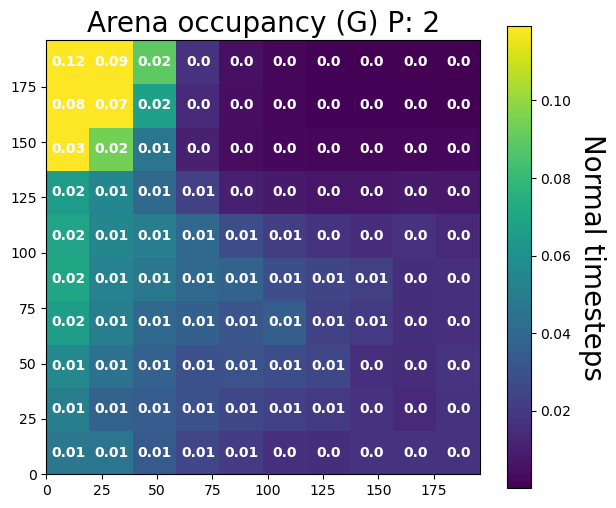

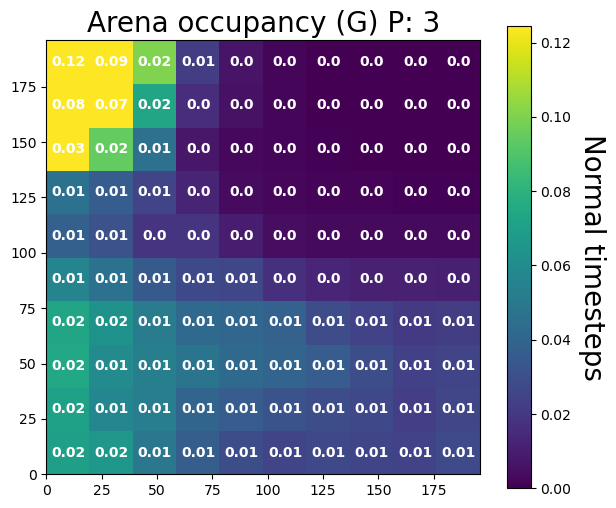

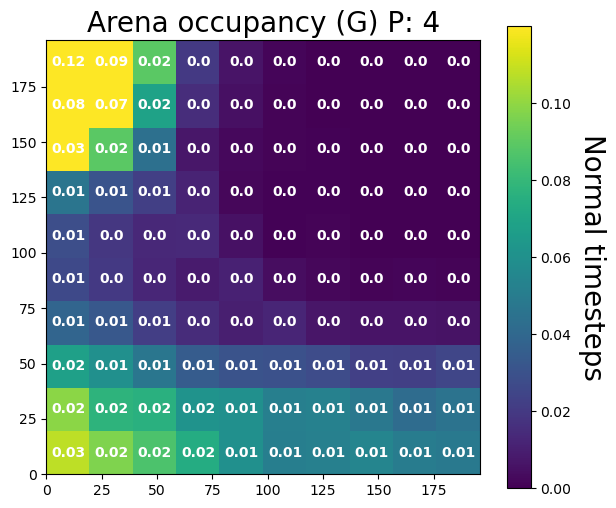

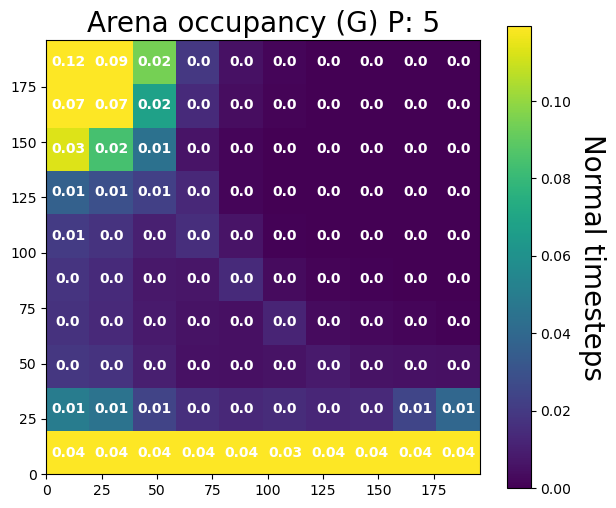

In [14]:
for i in range(len(Group_X_period)):
    xy_array = np.column_stack((Group_X_period[i], Group_Y_period[i]))
    x_array = xy_array[:,0]
    y_array = xy_array[:,1]

    bins = 10
    xedges= []
    yedges= []

    for j in range(bins):
        xedges.append((max(Group_X_period[i])/bins)*j)
        yedges.append((max(Group_Y_period[i])/bins)*j)

    xedges.append((max(Group_X_period[i])))
    yedges.append((max(Group_Y_period[i])))


    fig, ax = plt.subplots(figsize=(7, 6))
    ax.set_aspect("equal")
    hist, xbins, ybins, im = ax.hist2d(x_array, y_array, bins=(xedges, yedges), vmax=30000)
    H = hist.T
    H_normalized = H/float(xy_array.shape[0])

    for k in range(len(ybins)-1):
        for l in range(len(xbins)-1):
            ax.text(xbins[l]+xedges[1]/2, ybins[k]+yedges[1]/2, round(H_normalized[k,l],2), fontsize=10, ha="center", va="center", color="w", fontweight="bold")

    ax.set_title('Arena occupancy (G) P: ' + str(i+1), fontsize=20)
    ax.set_yticks(np.arange(0, 200, step=25))
    ax.set_xticks(np.arange(0, 200, step=25))
    hist = ax.imshow(H_normalized, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
    cbar = fig.colorbar(hist)
    cbar.set_label('Normal timesteps', rotation=270, fontsize=20, labelpad=+25)

    plt.show()

### Occupancy Maps per period informing about mean position during attractor dominance

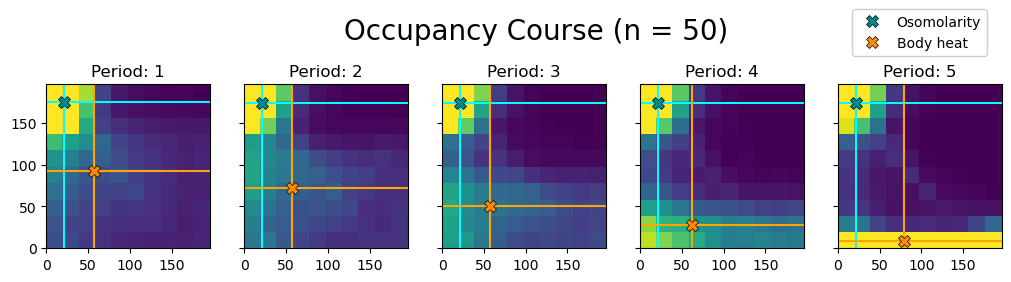

In [15]:
fig = plt.figure(figsize=(20, 20))
plots = []
for i in range(len(Group_X_period)):
    xy_array = np.column_stack((Group_X_period[i], Group_Y_period[i]))
    x_array = xy_array[:,0]
    y_array = xy_array[:,1]

    bins = 10
    xedges= []
    yedges= []

    for j in range(bins):
        xedges.append((max(Group_X_period[i])/bins)*j)
        yedges.append((max(Group_Y_period[i])/bins)*j)

    xedges.append((max(Group_X_period[i])))
    yedges.append((max(Group_Y_period[i])))


    ax = plt.subplot2grid((8,8), (1,i))
    
    plt.yticks(np.arange(0, 210, step=50))
    plt.xticks(np.arange(0, 210, step=50))
    if i != 0:
        ax.tick_params(labelleft=False)

    plt.title('Period: ' + str(i+1), fontsize=12)

    hist, xbins, ybins, im = ax.hist2d(x_array, y_array, bins=(xedges, yedges), vmax=30000)
    H = hist.T
    H_normalized = H/float(xy_array.shape[0])
    
    ax.plot([XpThirst_period[i]]*200,list(range(0, 200)),'cyan', markersize=1)
    ax.plot(list(range(0, 200)) ,[YpThirst_period[i]]*200, 'cyan', markersize=1)
    ax.plot([XpTemp_period[i]]*200,list(range(0, 200)),'orange', markersize=1)
    ax.plot(list(range(0, 200)),[YpTemp_period[i]]*200,'orange', markersize=1)
    ax.plot(XpThirst_period[i], YpThirst_period[i], marker='X', mfc = 'darkcyan', mec = 'black', mew = 0.5, ms=8, linestyle = 'None', label='Osomolarity')
    ax.plot(XpTemp_period[i], YpTemp_period[i], marker='X', mfc = 'darkorange', mec = 'black', mew = 0.5, ms=8, linestyle = 'None', label='Body heat')

    hist = ax.imshow(H_normalized, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

fig.suptitle('Occupancy Course (n = 50)', fontsize=20, y=0.815, x =0.37)
plt.legend(loc=1, framealpha=.95, bbox_to_anchor=(.95, 1.5))
plt.show()
fig.savefig('/home/roboticslab/Robotology/Repos/allostractor/Plots/DynamicEnv/FixedQ/OccupacyCourse.png', format='png', bbox_inches='tight')

## Internal state dynamics

aVs are averaged through simulations. Slots of 100 timesteps are used to condensate the data.

Then, mean aVs are ploted across simulation's time.

In [16]:
mean_slot = 1000
aVTempSlotMean = []
aVTempSlotVar = []

for i in range(int(timesteps/mean_slot)):
    SlotMean = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        data = d[dict_name]['aVtemperature'][mean_slot*i:mean_slot*(i+1)]
        SlotMean.append(stt.mean(data))
    aVTempSlotMean.append(stt.mean(SlotMean))
    aVTempSlotVar.append(stt.variance(SlotMean))
    
aVThirstSlotMean = []
aVThirstSlotVar = []

for i in range(int(timesteps/mean_slot)):
    SlotMean = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        data = d[dict_name]['aVthirst'][mean_slot*i:mean_slot*(i+1)]
        SlotMean.append(stt.mean(data))
    aVThirstSlotMean.append(stt.mean(SlotMean))
    aVThirstSlotVar.append(stt.variance(SlotMean))
    
GradTempSlotMean = []
for i in range(int(timesteps/mean_slot)):
    GradTempSlotMean.append(stt.mean(d[dict_name]['Grad_Temp'][mean_slot*i:mean_slot*(i+1)]))

In [17]:
meanaVTemp = np.mean(aVTempSlotMean)
meanaVThirst = np.mean(aVThirstSlotMean)

print("Mean Temperature aV along the simulation: " + str(meanaVTemp))
print("Mean Thirst aV along the simulation: " + str(meanaVThirst))

Mean Temperature aV along the simulation: 0.6576282198
Mean Thirst aV along the simulation: 0.6490323504


1000


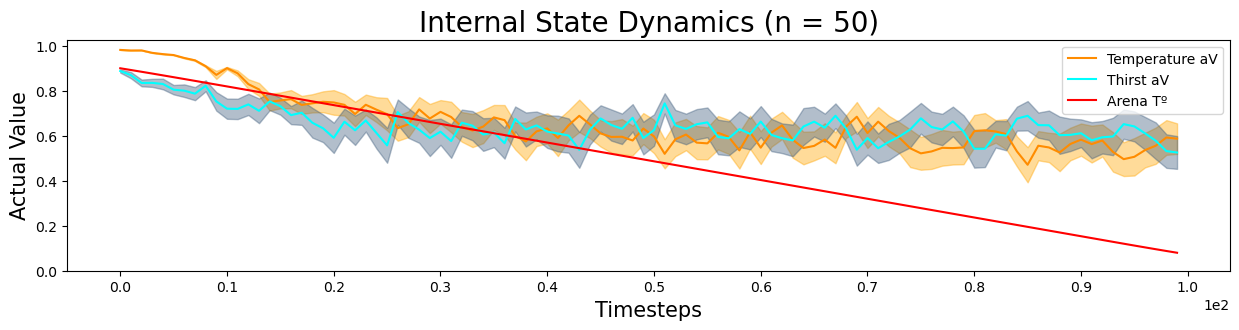

In [18]:
print(mean_slot)
fig = plt.figure(figsize=(15, 3))
plt.plot(aVTempSlotMean, label='Temperature aV', color="darkorange")
x = list(range(0, round(timesteps/mean_slot)))
plt.fill_between(np.array(x), np.array(aVTempSlotMean) - np.array([x / 2 for x in aVTempSlotVar]), np.array(aVTempSlotMean) + np.array([x / 2 for x in aVTempSlotVar]), color="orange", alpha=0.4) 
plt.plot(aVThirstSlotMean, label='Thirst aV', color="cyan")
plt.fill_between(np.array(x), np.array(aVThirstSlotMean) - np.array([x / 2 for x in aVThirstSlotVar]), np.array(aVThirstSlotMean) + np.array([x / 2 for x in aVThirstSlotVar]), color="#3F5D7D", alpha=0.4) 
plt.plot(GradTempSlotMean, label='Arena Tº', color="red")
plt.xticks(np.arange(0, timesteps/mean_slot+1, step=timesteps/mean_slot/10))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title('Internal State Dynamics (n = 50)', fontsize=20)
plt.ylabel('Actual Value', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.legend(loc=0)
plt.show()
fig.savefig('/home/roboticslab/Robotology/Repos/allostractor/Plots/DynamicEnv/FixedQ/aVTimeseries.png', format='png', bbox_inches='tight')

### Normality test for mean aVs

In [19]:
if sci.normaltest(aVThirstSlotMean)[1] < 0.05: print("aVThirstSlotMean Non-normal distribution")
if sci.normaltest(aVTempSlotMean)[1] < 0.05: print("aVTempSlotMean Non-normal distribution")
if sci.normaltest(GradTempSlotMean)[1] < 0.05: print("GradTempSlotMean Non-normal distribution")

aVThirstSlotMean Non-normal distribution
aVTempSlotMean Non-normal distribution
GradTempSlotMean Non-normal distribution


### Spearman correlation between internal dynamics and environmental temperature

In [20]:
print('aVThirstSlotMean: mean=%.3f stdv=%.3f' % (np.mean(aVThirstSlotMean), np.std(aVThirstSlotMean)))
print('aVTempSlotMean: mean=%.3f stdv=%.3f' % (np.mean(aVTempSlotMean), np.std(aVTempSlotMean)))
print('GradTempSlotMean: mean=%.3f stdv=%.3f' % (np.mean(GradTempSlotMean), np.std(GradTempSlotMean)))
print(sci.spearmanr(aVTempSlotMean, GradTempSlotMean))
print(sci.spearmanr(aVThirstSlotMean, GradTempSlotMean))
TempCorr = round(sci.spearmanr(aVTempSlotMean, GradTempSlotMean)[0],2)
ThirstCorr = round(sci.spearmanr(aVThirstSlotMean, GradTempSlotMean)[0],2)


mTemp,bTemp = np.polyfit(np.array(aVTempSlotMean), np.array(GradTempSlotMean), 1)
mThirst,bThirst = np.polyfit(np.array(aVThirstSlotMean), np.array(GradTempSlotMean), 1)

fig = plt.figure(figsize=(10, 3))
plt.scatter(aVThirstSlotMean, GradTempSlotMean, c = 'turquoise', alpha=0.6, edgecolor='none', s=25, label='Osmolarity Corr = ' + str(ThirstCorr))
plt.scatter(aVTempSlotMean, GradTempSlotMean, c = 'darkorange', alpha=0.6, edgecolor='none', s=25, label='Body Heat Corr = ' + str(TempCorr))
plt.plot(np.array(aVTempSlotMean), mTemp*np.array(aVTempSlotMean) + bTemp, color='#FF4500', markersize=10)
plt.plot(np.array(aVThirstSlotMean), mThirst*np.array(aVThirstSlotMean) + bThirst, color='darkcyan', markersize=10)
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.title('Relation between Internal States and Environmental Tª', fontsize=18, pad=10)
plt.ylabel('Env. Temperature', fontsize=13)
plt.xlabel('Internal state', fontsize=15)
plt.gca().invert_xaxis()

plt.grid(True, alpha=0.1)
plt.gca().invert_xaxis()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend(loc=1, framealpha=.95)
plt.show()

aVThirstSlotMean: mean=0.649 stdv=0.076
aVTempSlotMean: mean=0.658 stdv=0.126
GradTempSlotMean: mean=0.491 stdv=0.240
SpearmanrResult(correlation=0.8489528952895288, pvalue=6.769282752727178e-29)
SpearmanrResult(correlation=0.5524152415241523, pvalue=2.545887349609543e-09)


## Efficiency, Fairness and Stability

In [21]:
fulfilment = []

for i in range(int(timesteps/mean_slot)):
    SlotMeanTemp = []
    SlotMeanThirst = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        SlotMeanTemp.append(stt.mean(d[dict_name]['aVtemperature'][mean_slot*i:mean_slot*(i+1)]))
        SlotMeanThirst.append(stt.mean(d[dict_name]['aVthirst'][mean_slot*i:mean_slot*(i+1)]))
    fulfilment.append((stt.mean(SlotMeanTemp)+stt.mean(SlotMeanThirst))/2)

    
disparity = []

for i in range(int(timesteps/mean_slot)):
    SlotMeanTemp = []
    SlotMeanThirst = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        SlotMeanTemp.append(stt.mean(d[dict_name]['aVtemperature'][mean_slot*i:mean_slot*(i+1)]))
        SlotMeanThirst.append(stt.mean(d[dict_name]['aVthirst'][mean_slot*i:mean_slot*(i+1)]))
    disparity.append(abs(stt.mean(SlotMeanTemp)-stt.mean(SlotMeanThirst)))
    
    
stability = []

aVs_timestep = []
dVs_timestep = []

for i in range(len(d[dict_name]['aVtemperature'])):
    current_timestep = []
    current_timestep.append(d[dict_name]['aVtemperature'][i])
    current_timestep.append(d[dict_name]['aVthirst'][i])
    aVs_timestep.append(current_timestep)
    dVs_timestep.append([1, 1])

    
for i in range(int(timesteps/mean_slot)):
    stability.append(1-np.mean(np.array(dVs_timestep[mean_slot*i:mean_slot*(i+1)])-np.array(aVs_timestep[mean_slot*i:mean_slot*(i+1)])**2))

In [22]:
GlobalStability = 1-np.mean(np.array(dVs_timestep)-np.array(aVs_timestep)**2)
print("Global Stability = " + str(GlobalStability))

Global Stability = 0.603403711735


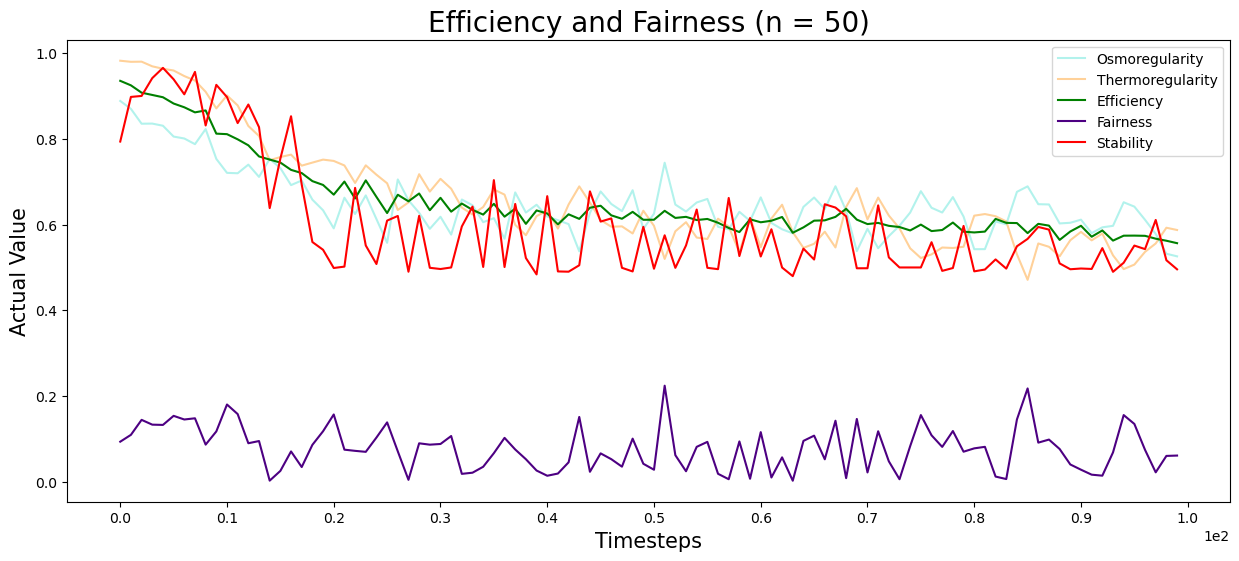

In [23]:
fig = plt.figure(figsize=(15, 6))

plt.plot(aVThirstSlotMean, label='Osmoregularity', color="turquoise", alpha=0.4)
plt.plot(aVTempSlotMean, label='Thermoregularity', color="darkorange", alpha=0.4)
plt.plot(fulfilment, label='Efficiency', color="Green")
plt.plot(disparity, label='Fairness', color="#4d0082")
plt.plot(stability, label='Stability', color="Red")

plt.xticks(np.arange(0, timesteps/mean_slot+1, step=timesteps/mean_slot/10))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title('Efficiency and Fairness (n = 50)', fontsize=20)
plt.ylabel('Actual Value', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.legend(loc=0)
plt.show()

fulfilment: mean=0.653 stdv=0.093
disparity: mean=0.078 stdv=0.051
GradTempSlotMean: mean=0.491 stdv=0.240

SpearmanrResult(correlation=0.21638163816381634, pvalue=0.030595194355594015)
SpearmanrResult(correlation=0.9361176117611759, pvalue=2.8616001696324728e-46)


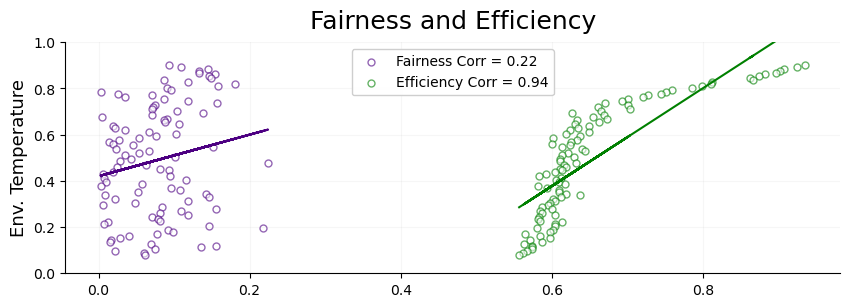

In [24]:
print('fulfilment: mean=%.3f stdv=%.3f' % (np.mean(fulfilment), np.std(fulfilment)))
print('disparity: mean=%.3f stdv=%.3f' % (np.mean(disparity), np.std(disparity)))
print('GradTempSlotMean: mean=%.3f stdv=%.3f' % (np.mean(GradTempSlotMean), np.std(GradTempSlotMean)))
print()
print(sci.spearmanr(disparity, GradTempSlotMean))
print(sci.spearmanr(fulfilment, GradTempSlotMean))
disparityCorr = round(sci.spearmanr(disparity, GradTempSlotMean)[0],2)
fulfilmentCorr = round(sci.spearmanr(fulfilment, GradTempSlotMean)[0],2)


mdisparity,bdisparity = np.polyfit(np.array(disparity), np.array(GradTempSlotMean), 1)
mfulfilment,bfulfilment = np.polyfit(np.array(fulfilment), np.array(GradTempSlotMean), 1)

fig = plt.figure(figsize=(10, 3))
plt.scatter(disparity, GradTempSlotMean, c = 'white', alpha=0.6, edgecolor='#4d0082', s=25, label='Fairness Corr = ' + str(disparityCorr))
plt.scatter(fulfilment, GradTempSlotMean, c = 'white', alpha=0.6, edgecolor='Green', s=25, label='Efficiency Corr = ' + str(fulfilmentCorr))

plt.plot(np.array(disparity), mdisparity*np.array(disparity) + bdisparity, color='#4d0082', markersize=10)
plt.plot(np.array(fulfilment), mfulfilment*np.array(fulfilment) + bfulfilment, color='Green', markersize=10)
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.title('Fairness and Efficiency', fontsize=18, pad=10)
plt.ylabel('Env. Temperature', fontsize=13)

#plt.xlabel('Level of Disparity/fulfilment', fontsize=15)
plt.grid(True, alpha=0.1)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend(loc=9, framealpha=.95)
plt.ylim(0,1)
plt.show()
#fig.savefig('/home/roboticslab/Robotology/Repos/allostractor/Plots/DynamicEnv/FixedQ/Stab_DisparityCorr.png', format='png', bbox_inches='tight')

Stability: mean=0.603 stdv=0.136
GradTempSlotMean: mean=0.491 stdv=0.240

SpearmanrResult(correlation=0.5334153442348186, pvalue=1.1034625355880857e-08)


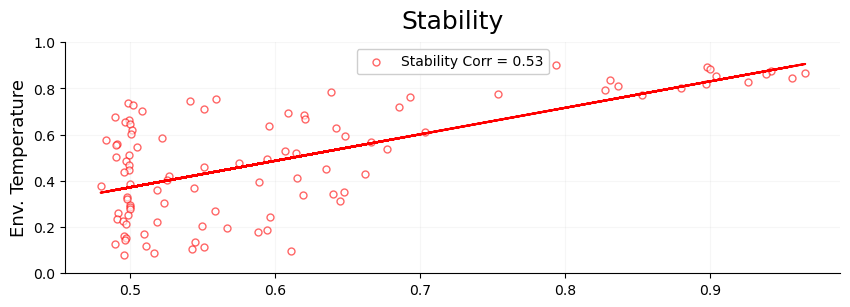

In [25]:
print('Stability: mean=%.3f stdv=%.3f' % (np.mean(stability), np.std(stability)))
print('GradTempSlotMean: mean=%.3f stdv=%.3f' % (np.mean(GradTempSlotMean), np.std(GradTempSlotMean)))
print()
print(sci.spearmanr(stability, GradTempSlotMean))

stabilityCorr = round(sci.spearmanr(stability, GradTempSlotMean)[0],2)

mstability,bstability = np.polyfit(np.array(stability), np.array(GradTempSlotMean), 1)

fig = plt.figure(figsize=(10, 3))
plt.scatter(stability, GradTempSlotMean, c = 'white', alpha=0.6, edgecolor='Red', s=25, label='Stability Corr = ' + str(stabilityCorr))

plt.plot(np.array(stability), mstability*np.array(stability) + bstability, color='Red', markersize=10)

plt.yticks(np.arange(0, 1.1, step=0.2))
plt.title('Stability', fontsize=18, pad=10)
plt.ylabel('Env. Temperature', fontsize=13)
plt.grid(True, alpha=0.1)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend(loc=9, framealpha=.95)
plt.ylim(0,1)
plt.show()
#fig.savefig('/home/roboticslab/Robotology/Repos/allostractor/Plots/DynamicEnv/FixedQ/Stab_DisparityCorr.png', format='png', bbox_inches='tight')

Efficiency: mean=0.653 stdv=0.093
Fairness: mean=0.078 stdv=0.051
Stability: mean=0.603 stdv=0.136
GradTempSlotMean: mean=0.491 stdv=0.240

SpearmanrResult(correlation=0.21638163816381634, pvalue=0.030595194355594015)
SpearmanrResult(correlation=0.9361176117611759, pvalue=2.8616001696324728e-46)
SpearmanrResult(correlation=0.5334153442348186, pvalue=1.1034625355880857e-08)


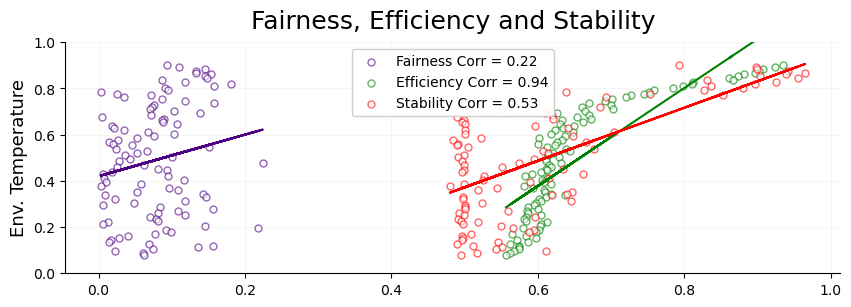

In [30]:
print('Efficiency: mean=%.3f stdv=%.3f' % (np.mean(fulfilment), np.std(fulfilment)))
print('Fairness: mean=%.3f stdv=%.3f' % (np.mean(disparity), np.std(disparity)))
print('Stability: mean=%.3f stdv=%.3f' % (np.mean(stability), np.std(stability)))
print('GradTempSlotMean: mean=%.3f stdv=%.3f' % (np.mean(GradTempSlotMean), np.std(GradTempSlotMean)))
print()
print(sci.spearmanr(disparity, GradTempSlotMean))
print(sci.spearmanr(fulfilment, GradTempSlotMean))
print(sci.spearmanr(stability, GradTempSlotMean))

disparityCorr = round(sci.spearmanr(disparity, GradTempSlotMean)[0],2)
fulfilmentCorr = round(sci.spearmanr(fulfilment, GradTempSlotMean)[0],2)
stabilityCorr = round(sci.spearmanr(stability, GradTempSlotMean)[0],2)


mdisparity,bdisparity = np.polyfit(np.array(disparity), np.array(GradTempSlotMean), 1)
mfulfilment,bfulfilment = np.polyfit(np.array(fulfilment), np.array(GradTempSlotMean), 1)
mstability,bstability = np.polyfit(np.array(stability), np.array(GradTempSlotMean), 1)

fig = plt.figure(figsize=(10, 3))
plt.scatter(disparity, GradTempSlotMean, c = 'white', alpha=0.6, edgecolor='#4d0082', s=25, label='Fairness Corr = ' + str(disparityCorr))
plt.scatter(fulfilment, GradTempSlotMean, c = 'white', alpha=0.6, edgecolor='Green', s=25, label='Efficiency Corr = ' + str(fulfilmentCorr))
plt.scatter(stability, GradTempSlotMean, c = 'white', alpha=0.6, edgecolor='Red', s=25, label='Stability Corr = ' + str(stabilityCorr))

plt.plot(np.array(disparity), mdisparity*np.array(disparity) + bdisparity, color='#4d0082', markersize=10)
plt.plot(np.array(fulfilment), mfulfilment*np.array(fulfilment) + bfulfilment, color='Green', markersize=10)
plt.plot(np.array(stability), mstability*np.array(stability) + bstability, color='Red', markersize=10)

plt.yticks(np.arange(0, 1.1, step=0.2))
plt.title('Fairness, Efficiency and Stability', fontsize=18, pad=10)
plt.ylabel('Env. Temperature', fontsize=13)
#plt.xlabel('Level of Disparity/fulfilment', fontsize=15)
plt.grid(True, alpha=0.1)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend(loc=9, framealpha=.95)
plt.ylim(0,1)
plt.show()

## Plasticity

In [27]:
WEcontrol = d['data0']['we_temp'].to_list()
for i in range(len(WEcontrol)):
    if WEcontrol[i] != WEcontrol[0]:
        print('Plasticity factor = ' + str(round(abs(WEcontrol[i] - WEcontrol[0]),5)))
        break

Plasticity factor = 0.001


In [28]:
mean_slot = 100
we_TempSlotMean = []
we_TempSlotVar = []

for i in range(int(timesteps/mean_slot)):
    SlotMean = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        data = d[dict_name]['we_temp'][mean_slot*i:mean_slot*(i+1)]
        SlotMean.append(stt.mean(data))
    we_TempSlotMean.append(stt.mean(SlotMean))
    we_TempSlotVar.append(stt.variance(SlotMean))
    
    
we_ThirstSlotMean = []
we_ThirstSlotVar = []

for i in range(int(timesteps/mean_slot)):
    SlotMean = []
    for j in range(simulations):
        dict_name = 'data'+ str(j)
        data = d[dict_name]['we_thirst'][mean_slot*i:mean_slot*(i+1)]
        SlotMean.append(stt.mean(data))
    we_ThirstSlotMean.append(stt.mean(SlotMean))
    we_ThirstSlotVar.append(stt.variance(SlotMean))

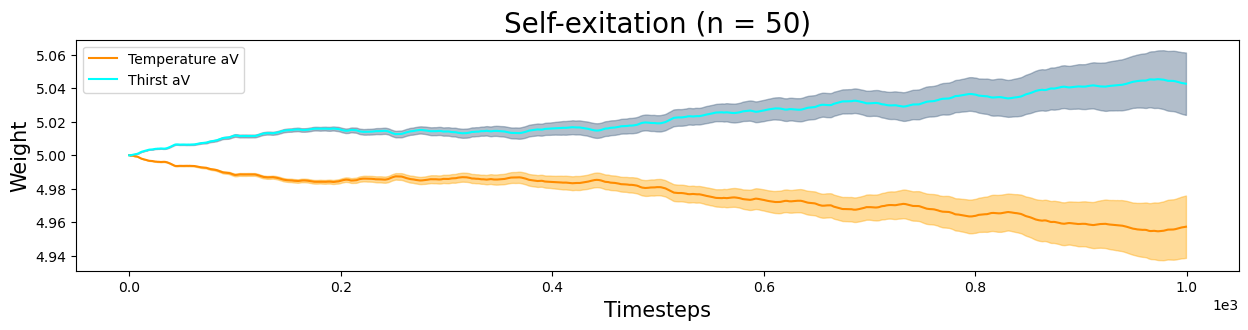

In [29]:
fig = plt.figure(figsize=(15, 3))
plt.plot(we_TempSlotMean, label='Temperature aV', color="darkorange")
x = list(range(0, round(timesteps/mean_slot)))
plt.fill_between(np.array(x), np.array(we_TempSlotMean) - np.array([x / 2 for x in we_TempSlotVar]), np.array(we_TempSlotMean) + np.array([x / 2 for x in we_TempSlotVar]), color="orange", alpha=0.4) 
plt.plot(we_ThirstSlotMean, label='Thirst aV', color="cyan")
plt.fill_between(np.array(x), np.array(we_ThirstSlotMean) - np.array([x / 2 for x in we_ThirstSlotVar]), np.array(we_ThirstSlotMean) + np.array([x / 2 for x in we_ThirstSlotVar]), color="#3F5D7D", alpha=0.4) 

#plt.xticks(np.arange(0, timesteps/100+1, step=timesteps/1000))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.title('Self-exitation (n = 50)', fontsize=20)
plt.ylabel('Weight', fontsize=15)
plt.xlabel('Timesteps', fontsize=15)
plt.legend(loc=0)
plt.show()